# Import library, create environment and quick review on the numbers info

In [2]:
#import gym library
import gym

#Import numpy and libraries for data processing and calculation
import numpy as np

#Import random 
import random

#Plotting library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Implement the cart pole environment
env = gym.make("MountainCar-v0")

#Quick review on action spaces number and state space number of this environment
print("Number of action:",env.action_space)
print("Number of state for taxi:",env.observation_space)

Number of action: Discrete(3)
Number of state for taxi: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


# Q-learning method

1. Divide each observation range into 25 equal discrete bins,then combine to make discrete state to apply Q-learning later (because Q-table only works on discrete state environment, not continuous states)

In [3]:
#Create a table that store 20x20 state for each state is the combination of 25 bins of position and 25 bins of velocity 
bin_number = 20
discrete_bins = [bin_number,bin_number]

#The size of each bin (compute by subtracting the highest value by the lowest value of observation 
#and divided by the number of created bin: 25 for position and 25 for velocity)
each_bin_size = (env.observation_space.high-env.observation_space.low)/discrete_bins

#Check for the size of position and velocity amount in each bin
print(each_bin_size)

[0.09  0.007]


2. Design a function to convert the continuous state into discrete state using the created bins for each observation

In [4]:
#When we input a continuous state into this function, it convert into the discrete function based on the bins size created above
#by subtracting current continuous information of observation by the minimum of it, and divided by the bins size
def discrete_state(continuous_state):
    discretestate = (continuous_state - env.observation_space.low)//each_bin_size
    
    #Return a state as combination of integer locations of the bins (in the range of position and velocitiy)
    return tuple(discretestate.astype(np.int))

#Test the function
print(discrete_state(env.reset()))

(8, 10)


C:\Users\lephu\AppData\Local\Temp\ipykernel_18864\590954682.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


3. Create a Q-table using discrete states

In [5]:
#Create a 3-dimensional table with attribute of : position, velocity and action
Qtable = np.zeros(discrete_bins + [env.action_space.n])

#Check for the shape of Q-table
print(Qtable.shape)

#Create a policy that taking action has a highest Q-value return for each state (using Q-table) using argmax
def policy(state):
    return np.argmax(Qtable[state])

(20, 20, 3)


4. Initialize hyperparameter and runing the training episodes

In [6]:
#Hyperparameter
alpha = 0.1    #Learning_rate
gamma = 0.9    #Discounted_factor

In [7]:
#Create array to store the maximum position the car could get for each episode for training evaluation later:
maxpos_array = []

#Running 10000 training episode
for i in range(10000):
    print("Train ep:", i)
    
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create variables to store maximum position for each episode could reach:
    maxpos = -1
    
    #Create a loop while done is true
    while (done!=True):    
        #Pull action based on policy
        action = policy(state)
        
        #Take output from action
        obs, rw, done, _ = env.step(action)
        
        #Update max position after every action
        if (obs[0]>maxpos):
            maxpos = obs[0]
        '''
        Render the environment for each 1000 episode to check for result
        if (i%1000==0):
            env.render()
        '''
            
        #Check if the action finish the problem yet (make the car to to the flag, because the problem has 2 episode termination)
        #If yes, check to see if the done == true because the car reach the flag or reach 200 action without reaching it's goal
        if (done == True):
            #Take the position of the observation and compare to the flag position (0.5)
            if (obs[0] > 0.5):
                maxpos_array.append(0.5)
            #else, the agent reach 200 action without reaching the flag
            else:
                maxpos_array.append(maxpos)
                
        #The action does not done the problem
        else:
            #Convert new observation state into discrete
            newstate = discrete_state(obs)

            #Update new Qvalue for an action in the state space using the given formula using the mentioned learning rate:
            #Q(state,action) ← (1−α)Q(state,action) + α(reward+γmax(a)Q(next state,all actions))
            oldvalue = Qtable[state+(action,)]
            newQvalue = (1-alpha)*oldvalue + alpha*( rw + gamma*np.max(Qtable[newstate]))
            Qtable[state+(action,)] = newQvalue

            #Update current state for next action is the new state
            state = newstate

print("Done training")

Train ep: 0
Train ep: 1
Train ep: 2
Train ep: 3
Train ep: 4
Train ep: 5
Train ep: 6
Train ep: 7
Train ep: 8
Train ep: 9
Train ep: 10


C:\Users\lephu\AppData\Local\Temp\ipykernel_18864\590954682.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


Train ep: 11
Train ep: 12
Train ep: 13
Train ep: 14
Train ep: 15
Train ep: 16
Train ep: 17
Train ep: 18
Train ep: 19
Train ep: 20
Train ep: 21
Train ep: 22
Train ep: 23
Train ep: 24
Train ep: 25
Train ep: 26
Train ep: 27
Train ep: 28
Train ep: 29
Train ep: 30
Train ep: 31
Train ep: 32
Train ep: 33
Train ep: 34
Train ep: 35
Train ep: 36
Train ep: 37
Train ep: 38
Train ep: 39
Train ep: 40
Train ep: 41
Train ep: 42
Train ep: 43
Train ep: 44
Train ep: 45
Train ep: 46
Train ep: 47
Train ep: 48
Train ep: 49
Train ep: 50
Train ep: 51
Train ep: 52
Train ep: 53
Train ep: 54
Train ep: 55
Train ep: 56
Train ep: 57
Train ep: 58
Train ep: 59
Train ep: 60
Train ep: 61
Train ep: 62
Train ep: 63
Train ep: 64
Train ep: 65
Train ep: 66
Train ep: 67
Train ep: 68
Train ep: 69
Train ep: 70
Train ep: 71
Train ep: 72
Train ep: 73
Train ep: 74
Train ep: 75
Train ep: 76
Train ep: 77
Train ep: 78
Train ep: 79
Train ep: 80
Train ep: 81
Train ep: 82
Train ep: 83
Train ep: 84
Train ep: 85
Train ep: 86
Train ep: 87

5. Q-learning evaluation by solve 100 episodes

In [8]:
#Create counter to count success time for 100 episode
succes_time = 0

#Loop through 100 episode
for i in range(100):
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create a loop while done is true
    while (done!=True):    
        #Pull action based on policy
        action = policy(state)
        #Take output from action
        obs, rw, done, _ = env.step(action)

        '''
        Render the environment for each 1000 episode to check for result
        if (i%1000==0):
            env.render()
        '''
            
        #Check if the action finish the problem yet (make the car to to the flag, because the problem has 2 episode termination)
        #If yes, check to see if the done == true because the car reach the flag or reach 200 action without reaching it's goal
        if (done == True):
            #Take the position of the observation and compare to the flag position (0.5)
            if (obs[0] > 0.5):
                succes_time+=1
            #else, the agent reach 200 action without reaching the flag
            else:
                succes_time+=0
                
        #The action does not done the problem
        else:
            #Convert new observation state into discrete
            newstate = discrete_state(obs)

            #Update current state for next action is the new state
            state = newstate

print("Done testing, success time over 100 episodes:",succes_time)

C:\Users\lephu\AppData\Local\Temp\ipykernel_18864\590954682.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


Done testing, success time over 100 episodes: 45


6. Visualization (overview and specific)

([<matplotlib.axis.YTick at 0x21d1e7f23b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

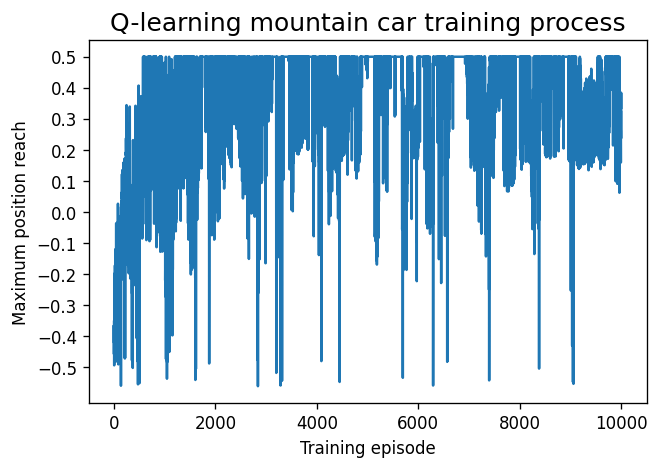

In [9]:
#Create variable x to store training episodes number from 1 to 10000
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the result of all the episodes of training
y = maxpos_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.plot(x, y)

#Name the elements
ax.set_title('Q-learning mountain car training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))

([<matplotlib.axis.YTick at 0x21d20bafa90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

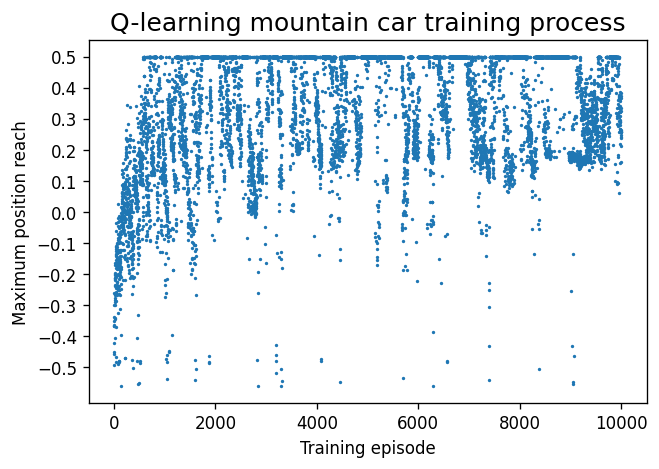

In [10]:
#Scatter for a better observation of the Q-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y,1)

#Name the elements
plt.title('Q-learning mountain car training process', fontsize=15)
plt.xlabel('Training episode', fontsize=10)
plt.ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))

# Applying TD(0) method for mountain car problem

reset the Q-table for reuse

In [11]:
Qtable = np.zeros(discrete_bins + [env.action_space.n])

New TD(0) training iteration with different formula to update Q-value after episode

In [12]:
#Create array to store the maximum position the car could get for each episode for training evaluation later:
maxpos_array = []

#Running 10000 training episode
for i in range(10000):
    print("Train ep:", i)
    
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create variables to store maximum position for each episode could reach:
    maxpos = -1
    
    #Create an loop until the episode is solved
    while (done!= True):    
        #Pull action based on policy
        action = policy(state)
        
        #Take output from action
        obs, rw, done, _ = env.step(action)
        
        #Update max position after every action
        if (obs[0]>maxpos):
            maxpos = obs[0]
               
        #Convert new observation state into discrete, initialize new action based on the same policy
        newstate = discrete_state(obs)
        next_action = policy(newstate)
        
        #Update new Qvalue for an action in the state space using the TD(0) Learning formula:
            
        oldvalue = Qtable[state+(action,)]
        newQvalue = oldvalue + alpha*(rw + gamma*Qtable[newstate+(next_action,)] - oldvalue)
        Qtable[state+(action,)] = newQvalue

        #Update current state for next action is the new state
        state = newstate
    maxpos_array.append(maxpos)

print(Qtable)
print("Done training")

Train ep: 0
Train ep: 1
Train ep: 2
Train ep: 3
Train ep: 4
Train ep: 5
Train ep: 6
Train ep: 7
Train ep: 8
Train ep: 9
Train ep: 10
Train ep: 11
Train ep: 12
Train ep: 13
Train ep: 14
Train ep: 15
Train ep: 16


C:\Users\lephu\AppData\Local\Temp\ipykernel_18864\590954682.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


Train ep: 17
Train ep: 18
Train ep: 19
Train ep: 20
Train ep: 21
Train ep: 22
Train ep: 23
Train ep: 24
Train ep: 25
Train ep: 26
Train ep: 27
Train ep: 28
Train ep: 29
Train ep: 30
Train ep: 31
Train ep: 32
Train ep: 33
Train ep: 34
Train ep: 35
Train ep: 36
Train ep: 37
Train ep: 38
Train ep: 39
Train ep: 40
Train ep: 41
Train ep: 42
Train ep: 43
Train ep: 44
Train ep: 45
Train ep: 46
Train ep: 47
Train ep: 48
Train ep: 49
Train ep: 50
Train ep: 51
Train ep: 52
Train ep: 53
Train ep: 54
Train ep: 55
Train ep: 56
Train ep: 57
Train ep: 58
Train ep: 59
Train ep: 60
Train ep: 61
Train ep: 62
Train ep: 63
Train ep: 64
Train ep: 65
Train ep: 66
Train ep: 67
Train ep: 68
Train ep: 69
Train ep: 70
Train ep: 71
Train ep: 72
Train ep: 73
Train ep: 74
Train ep: 75
Train ep: 76
Train ep: 77
Train ep: 78
Train ep: 79
Train ep: 80
Train ep: 81
Train ep: 82
Train ep: 83
Train ep: 84
Train ep: 85
Train ep: 86
Train ep: 87
Train ep: 88
Train ep: 89
Train ep: 90
Train ep: 91
Train ep: 92
Train ep: 93

([<matplotlib.axis.YTick at 0x21d1e600d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

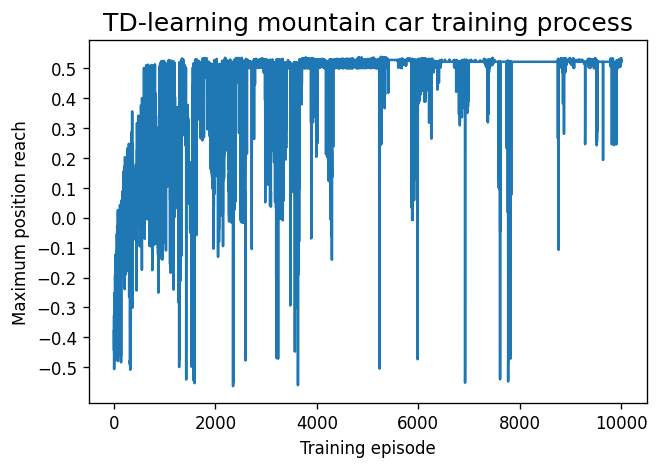

In [13]:
#Create variable x to store training episodes number from 1 to 10000
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the result of episode of training in TD(0) method
y = maxpos_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.plot(x, y)

#Name the elements
ax.set_title('TD-learning mountain car training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))


([<matplotlib.axis.YTick at 0x21d20954cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

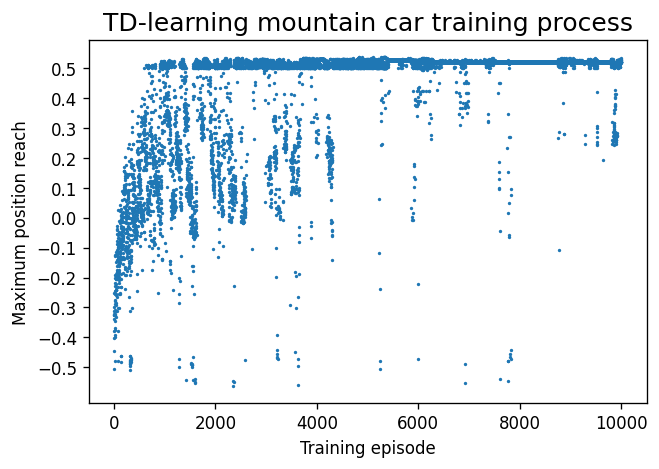

In [14]:
#Scatter for a better observation of the TD(0)-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y,1)

#Name the elements
plt.title('TD-learning mountain car training process', fontsize=15)
plt.xlabel('Training episode', fontsize=10)
plt.ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))